In [111]:
import torch
import pickle
import random
# from torchvision import transforms # no torchvision because we are not working with images but with points
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [99]:
data_file = open("./extended_prepared_dataset.pickle", "rb")
data = pickle.load(data_file)
print(len(data))
print(data[0][1])
# the symbols are one-hot encoded; alpha is the first and epsilon is the last symbol
# first 60 symbols are alpha; second 60 are beta etc.

300
[1. 0. 0. 0. 0.]


In [100]:
random_seed = 69
test_split = 0.2
batch_size = 32

In [122]:
class CustomSymbolDataset(Dataset):
    def __init__(self, symbols, labels, transform=None, target_transform=None):
        """
            symbols - a list of tuples where the first 
            element is an array of normalized points and
            the second is the one-hot encoded vector of
            the respective symbol
        """
        self.symbols = symbols
        self.labels = labels
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        symbol = self.symbols[idx]
        label = self.labels[idx]
        if self.transform:
            symbol = self.transform(symbol)
        if self.target_transform:
            label = self.target_transform(label)
        return symbol, label
    
class ToTensor(object):
    """Convert numpy array in sample to Tensors."""
    def __call__(self, sample):
        return torch.from_numpy(sample)
    
def get_coordinates(array: list):
    arr = array.copy()
    x = arr[0::2]
    y = arr[1::2]
    return x, y

In [102]:
# Split the data into a train and validation set
X_train, X_val, y_train, y_val = train_test_split(
    dataset.symbols, 
    dataset.labels, 
    test_size=0.2,
    random_state=random_seed,
    shuffle=True)

# Define the train dataset and dataloader
train_dataset = CustomSymbolDataset(X_train, y_train, transform=ToTensor(), target_transform=ToTensor())
train_dataloader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, num_workers=0)

# Define the validation dataset and dataloader
val_dataset = CustomSymbolDataset(X_val, y_val, transform=ToTensor(), target_transform=ToTensor())
val_dataloader = DataLoader(dataset=val_dataset, batch_size=32, shuffle=False, num_workers=0)

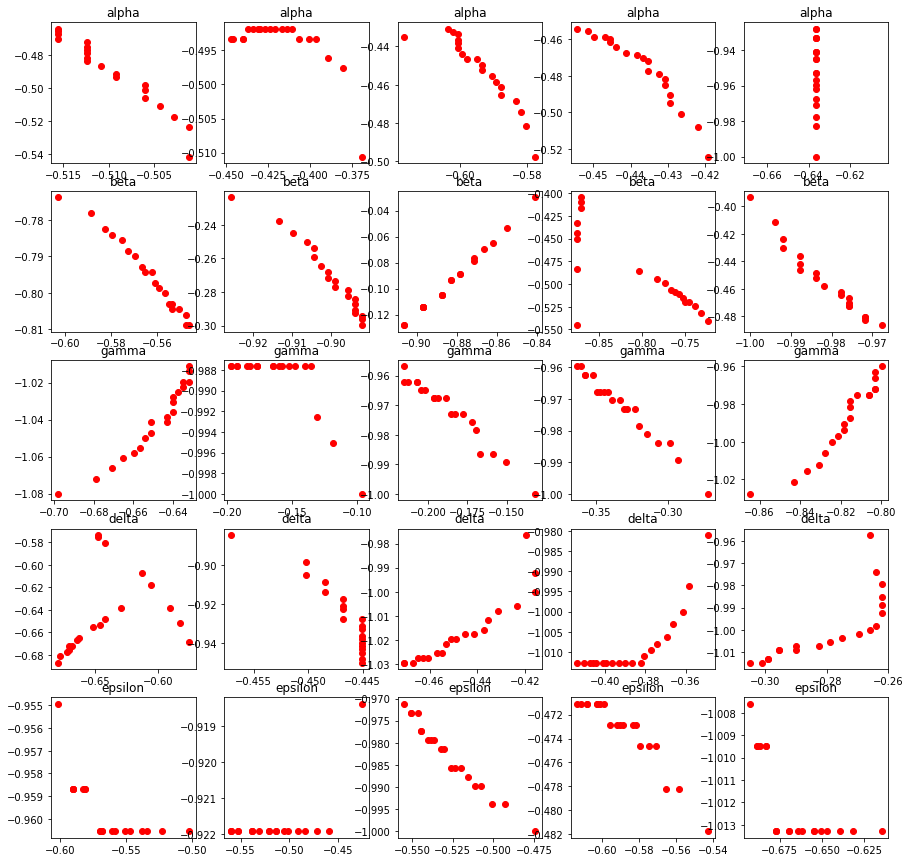

In [136]:
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i, symb in enumerate(['alpha', 'beta', 'gamma', 'delta', 'epsilon']):
    for j, s in enumerate(random.sample(data[i*60:(i+1)*60], 5)):
        x, y = get_coordinates(s[0])
        ax[i, j].plot(x, y, 'ro')
        ax[i,j].title.set_text(f"{symb}")
    
# TODO: Saznaj kako si spremao ove točke jbg. Ima ih 40. Raspored x0, y0, x1, y1, x2, ...

In [ ]:
# TODO: Vizualiziraj nakon treniranja kako koja mreža dobro ili loše radi na pojedinim simbolima. 
def unnormalize_symbol_vector(points, M=20, symb_mean, m):
    # You need to pass M, symb_mean, and m as additional arguments because they are needed to unnormalize the points
    unnormalized_points = [(el[0]*m + symb_mean, el[1]*m + symb_mean) for el in points]
    return unnormalized_points